<div >
<img src = "../../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_SS/blob/main/Lecture06/Notebook_SS06_Ridge.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Regularization: Ridge

## Predicting Wages

Our objective today is to construct a model of individual wages

$$
w = f(X) + u
$$

where w is the  wage, and X is a matrix that includes potential explanatory variables/predictors. In this problem set, we will focus on a linear model of the form

\begin{align}
 ln(w) & = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p  + u
\end{align}

were $ln(w)$ is the logarithm of the wage.

To illustrate I'm going to use a sample of the NLSY97. The NLSY97 is  a nationally representative sample of 8,984 men and women born during the years 1980 through 1984 and living in the United States at the time of the initial survey in 1997.  Participants were ages 12 to 16 as of December 31, 1996.  Interviews were conducted annually from 1997 to 2011 and biennially since then.  

Let's load the packages and the data set:

In [1]:
install.packages("pacman") #run this line if you use Google Colab

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#packages
require("pacman")
p_load("tidyverse","stargazer")

nlsy <- read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')

nlsy = nlsy  %>%   drop_na(educ) #dropea los valores faltantes (NA)

Loading required package: pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


stargazer installed

Rows: 1266 Columns: 994
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (994): lnw_2016, educ, black, hispanic, other, exp, afqt, mom_educ, dad_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We want to construct a model that predicts well out of sample, and we have potentially 994 regressors. We are going to regularize this regression using Ridge.

## Ridge

We first illustrate ridge regression, which can be fit using glmnet() with alpha = 0 and seeks to minimize

$$
\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij}    \right) ^ 2 + \lambda \sum_{j=1}^{p} \beta_j^2 .
$$

Notice that the intercept is not penalized.


Ridge penalizes the squares  of the coefficients. As a result, ridge shrinks coefficients toward zero, but not all the way.

We are going to use Glmnet. Glmnet is a package that fits generalized linear and similar models via penalized maximum likelihood. The regularization path is computed for the lasso or elastic net penalty at a grid of values (on the log scale) for the regularization parameter lambda. The algorithm is extremely fast!

In [3]:
p_load("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’



glmnet installed



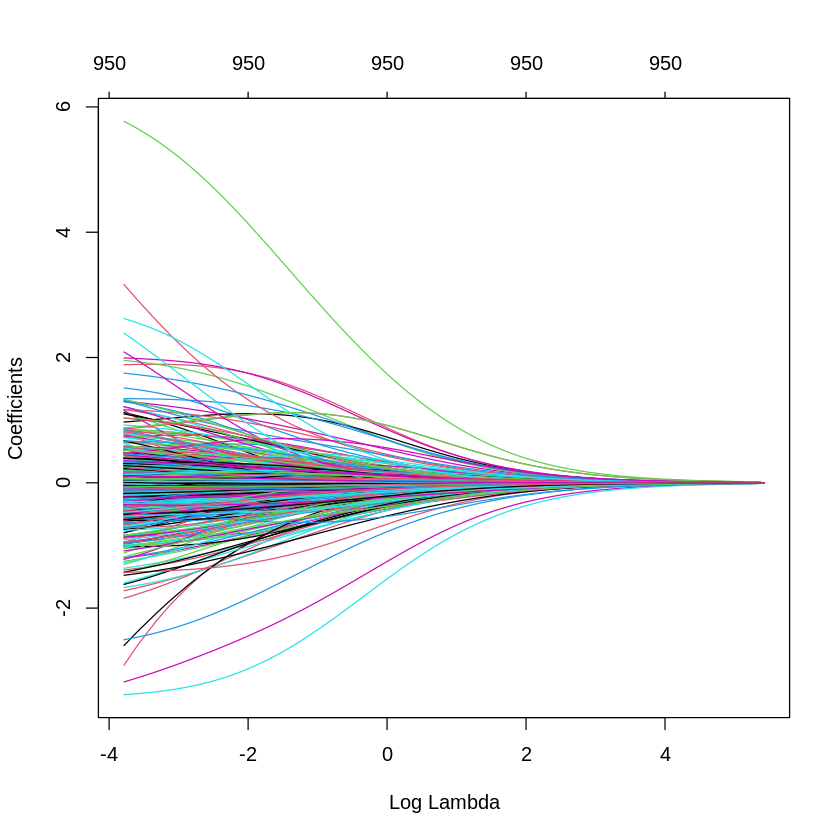

In [8]:
# Matrix of predictos (all but lnw_2016)
X0 <- as.matrix(nlsy  %>% select(-lnw_2016))

#Vector that needs predicting
y <- nlsy$lnw_2016


ridge0 <- glmnet(
  x = X0,
  y = y,
  alpha = 0 #ridge
)


plot(ridge0, xvar = "lambda")

In [9]:
ridge0$lambda

[1] 226.87093782 206.71634899 188.35223828 171.61954455 156.37333721
  [6] 142.48156092 129.82389174 118.29069501 107.78207569  98.20701314
 [11]  89.48257277  81.53318763  74.29000395  67.69028475  61.67686642
 [16]  56.19766359  51.20521805  46.65628760  42.51147160  38.73486963
 [21]  35.29377057  32.15836927  29.30150837  26.69844313  24.32662702
 [26]  22.16551653  20.19639313  18.40220123  16.76740039  15.27783075
 [31]  13.92059037  12.68392349  11.55711869  10.53041612   9.59492297
 [36]   8.74253646   7.96587362   7.25820736   6.61340822   6.02589126
 [41]   5.49056769   5.00280079   4.55836576   4.15341311   3.78443533
 [46]   3.44823653   3.14190470   2.86278654   2.60846448   2.37673568
 [51]   2.16559304   1.97320772   1.79791338   1.63819171   1.49265928
 [56]   1.36005554   1.23923196   1.12914200   1.02883214   0.93743353
 [61]   0.85415452   0.77827378   0.70913409   0.64613657   0.58873558
 [66]   0.53643393   0.48877862   0.44535687   0.40579260   0.36974310
 [71]   0.33689614   0.30696722   0.27969710   0.25484958   0.23220944
 [76]   0.21158060   0.19278436   0.17565793   0.16005296   0.14583430
 [81]   0.13287878   0.12107420   0.11031830   0.10051792   0.09158819
 [86]   0.08345175   0.07603812   0.06928311   0.06312819   0.05752005
 [91]   0.05241013   0.04775416   0.04351181   0.03964634   0.03612427
 [96]   0.03291509   0.02999100   0.02732668   0.02489906   0.02268709

## Scale Equivariance

We are going to illustrate the scale problems using just `education` and `afqt` scores

In [10]:


#Vector that needs predicting
y <- nlsy$lnw_2016

# Matrix of predictos (only educ and afqt)
X <- as.matrix(nlsy  %>% select(educ,afqt))



In [11]:
stargazer(data.frame(X),type="text")


Statistic   N    Mean  St. Dev.  Min   Max  
--------------------------------------------
educ      1,266 14.314  2.900     8     20  
afqt      1,266 5.325   2.915   0.000 10.000
--------------------------------------------


Let's run the ridge regression (we need to set the parameter `alpha` to zero)

In [17]:
ridge <- glmnet(
  x = X,
  y = y,
  alpha = 0, #ridge
  lambda=1,
  standarize=FALSE,
)

Let's see the coefficients we obtained

In [18]:
coef(ridge)

3 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 2.55179582
educ        0.02829430
afqt        0.02874008

Compare to OLS

In [19]:
ols<-lm(y~X)
summary(ols)


Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6858 -0.4214 -0.0299  0.3514  4.5426 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.147862   0.121059  17.742  < 2e-16 ***
Xeduc       0.048462   0.009813   4.939 8.92e-07 ***
Xafqt       0.050380   0.009764   5.160 2.87e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8317 on 1263 degrees of freedom
Multiple R-squared:  0.08583,	Adjusted R-squared:  0.08438 
F-statistic: 59.29 on 2 and 1263 DF,  p-value: < 2.2e-16


### What happens if we change the scale for education?

In [26]:
X[,1]<-X[,1]/1000 #divido la primer columna (educacion) por mil

In [22]:
ridge_1000 <- glmnet(
  x = X,
  y = y,
  alpha = 0, #ridge
 lambda=1,
  standarize=FALSE,
)

In [23]:
coef(ridge_1000)

3 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 2.5517958191
educ        0.0000282943
afqt        0.0287400764

In [24]:
ols_1000<-lm(y~X)
summary(ols_1000)


Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6858 -0.4214 -0.0299  0.3514  4.5426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.148e+00  1.211e-01  17.742  < 2e-16 ***
Xeduc       4.846e-05  9.813e-06   4.939 8.92e-07 ***
Xafqt       5.038e-02  9.764e-03   5.160 2.87e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8317 on 1263 degrees of freedom
Multiple R-squared:  0.08583,	Adjusted R-squared:  0.08438 
F-statistic: 59.29 on 2 and 1263 DF,  p-value: < 2.2e-16


In [25]:
ols_1000$coefficients[2]*1000

Xeduc 
0.04846231

## Selección de la penalización

In [ ]:
p_load("caret")

In [ ]:
set.seed(123)
fitControl <- trainControl(## 5-fold CV, 10 better
                           method = "cv",
                           number = 5)

In [ ]:
ridge<-train(lnw_2016~.,
             data=nlsy,
             method = 'glmnet',
             trControl = fitControl,
             tuneGrid = expand.grid(alpha = 0, #Ridge
                                    lambda = seq(0,20,0.1))
              )


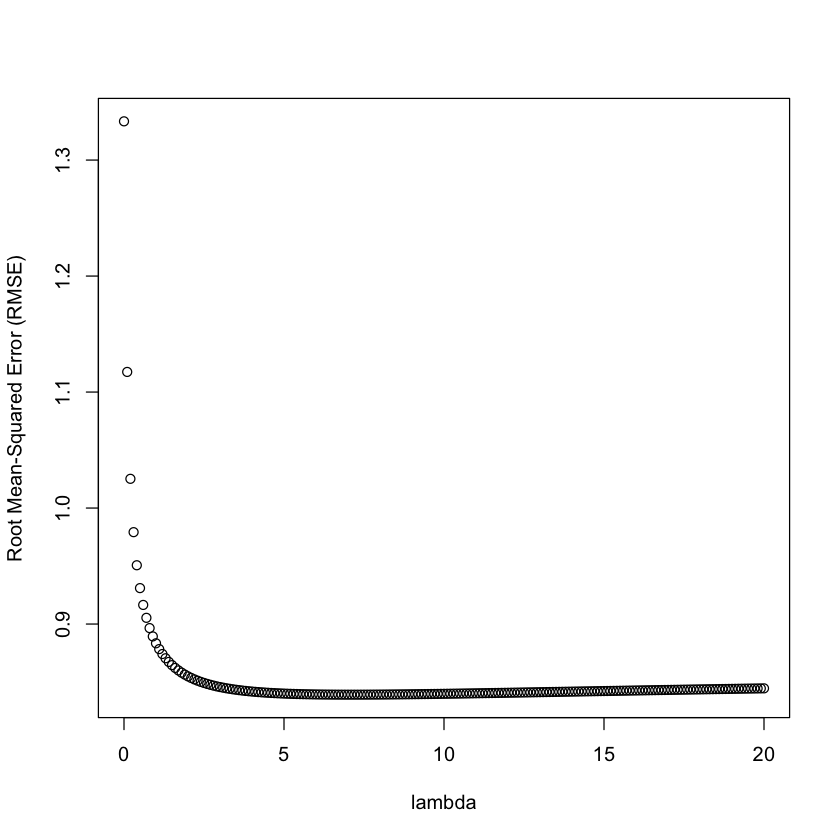

In [ ]:
plot(ridge$results$lambda,
     ridge$results$RMSE,
     xlab="lambda",
     ylab="Root Mean-Squared Error (RMSE)"
     )

In [ ]:
ridge$bestTune

,alpha,lambda
,<dbl>,<dbl>
73,0,7.2


In [ ]:
coef_ridge<-coef(ridge$finalModel, ridge$bestTune$lambda)
coef_ridge

994 x 1 sparse Matrix of class "dgCMatrix"
                                      s1
(Intercept)                 2.955876e+00
educ                        4.771209e-03
black                      -2.512985e-02
hispanic                    6.443190e-03
other                      -3.324482e-02
exp                        -3.729301e-03
afqt                        4.863995e-03
mom_educ                    2.614441e-03
dad_educ                    1.779072e-03
yhea_100_1997              -5.390930e-03
yhea_2000_1997              4.937162e-03
yhea_2100_1997              4.352932e-04
yhea_2200_1997              3.194542e-05
ysaq_284_1997               6.120416e-03
ysaq_285_1997               7.480163e-04
ysaq_291a_1997              6.308787e-03
ysaq_292_1997               3.418022e-04
ysaq_293_1997               1.157648e-03
ysaq_294_1997               3.362526e-04
ysaq_294a_1997              .           
ysaq_295_1997               .           
ysaq_296_1997               .           
ysaq_297_1997 

### Compare to OLS fit

In [ ]:
ridge$results$RMSE[which.min(ridge$results$lambda)]

[1] 1.333399

In [ ]:
linear_reg<-train(lnw_2016~.,
                 data=nlsy,
                  method = 'lm',
                  trControl = fitControl
)


linear_reg

Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


Linear Regression 

1266 samples
 993 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1013, 1011, 1012, 1014, 1014 
Resampling results:

  RMSE     Rsquared     MAE     
  2.82355  0.003200609  1.438444

Tuning parameter 'intercept' was held constant at a value of TRUE

### Compare to Lasso?

In [ ]:
lasso<-train(lnw_2016~.,
             data=nlsy,
             method = 'glmnet',
             trControl = fitControl,
             tuneGrid = expand.grid(alpha = 1, #lasso
                                    lambda = ridge0$lambda)
              )


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [ ]:
RMSE_df<-cbind(linear_reg$results$RMSE,
               ridge$results$RMSE[which.min(ridge$results$lambda)],
               lasso$results$RMSE[which.min(lasso$results$lambda)]
              )
colnames(RMSE_df)<-c("OLS","RIDGE","LASSO")
RMSE_df

OLS,RIDGE,LASSO
2.82355,1.333399,0.8687309
